In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}



In [3]:
df = pd.DataFrame(data=d)

In [4]:
df

miles_per_week completed_50m_ultra
0                37                  no
1                39                  no
2                46                  no
3                51                  no
4                88                  no
..              ...                 ...
96               67                 yes
97               74                 yes
98               79                 yes
99               90                 yes
100             112                 yes

[101 rows x 2 columns]

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
finished_race = ['no','yes']

In [6]:
enc=OrdinalEncoder(categories=[finished_race])

In [7]:
df['completed_50m_ultra']=enc.fit_transform(df[['completed_50m_ultra']])

In [8]:
df

miles_per_week  completed_50m_ultra
0                37                  0.0
1                39                  0.0
2                46                  0.0
3                51                  0.0
4                88                  0.0
..              ...                  ...
96               67                  1.0
97               74                  1.0
98               79                  1.0
99               90                  1.0
100             112                  1.0

[101 rows x 2 columns]

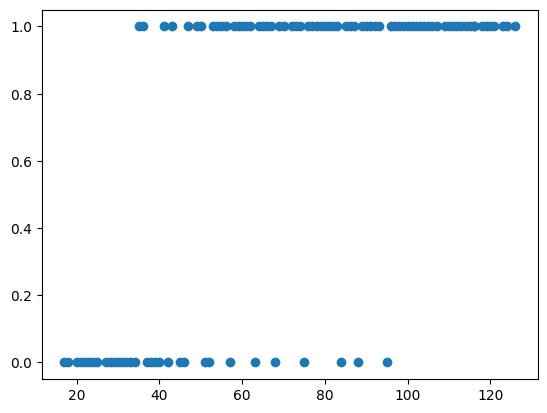

In [9]:
plt.scatter(df.miles_per_week,df.completed_50m_ultra)

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

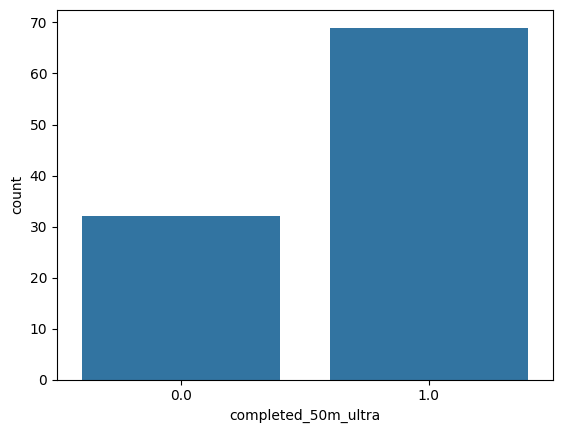

In [10]:
sns.countplot(x='completed_50m_ultra',data=df)

In [11]:
X = df.iloc[:,0:1]
Y = df.iloc[:,1]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,random_state=11)

In [14]:
X_train.shape

(80, 1)

In [15]:
X_test.shape

(21, 1)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,Y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
model.score(X_test,Y_test)

0.9047619047619048

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
print(confusion_matrix(Y_test,y_pred))

[[ 5  1]
 [ 1 14]]


In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

